SMB、HML两个指标的计算方式如下：
1. 首先，按市值大小平均分为两组(Small 组, Big 组)，基准是这一时间的市场上公司市值中位数;
2. 按 BM 从小到大分三组,即前 30%(Growth 组),中间 40%(Neutral 组),后 30%(Value 组)；
3. 每个组的月回报以组内所有成员股票当月回报的加权平均数为依据,计算每个月的 SMB 和 HML 值。具体计算公式如下: 
   SMB = Small size return - Big size return)
   HML = Value company return - Growth company return
4. 以市场回报减去无风险回报,即得到超额市场回报(Rm-Rf)。（由于Ricequant平台无法提取国债收益率，我只能对这个时段的所有IBO1M求平均值作为无风    险回报率

In [1]:
%pdb

Automatic pdb calling has been turned ON


In [2]:
# %load fama.py
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.parser import parse
from dateutil.relativedelta import relativedelta


In [3]:
research_starttime='2010-04-01'
research_endtime='2018-04-01'
format='%Y-%m-%d %H:%M:%S'
data_type=""#"net"
data_mode="fast"#"fast"

### 定义基础数据获取函数

In [4]:
## 从网络获取数据
def get_dp():
        interval_month=24
        # date_range=pd.date_range(research_starttime,research_endtime)
        # len(date_range)/31
        # pd.to_datetime(research_endtime)-(pd.to_datetime(research_endtime)-pd.to_datetime(research_starttime))/4
        # print(datetime.date.today() +relativedelta(months=-1))
        step0=pd.to_datetime(research_endtime)
        step1=pd.to_datetime(research_endtime)-relativedelta(months=interval_month*1)
        step2=pd.to_datetime(research_endtime)-relativedelta(months=interval_month*2)
        step3=pd.to_datetime(research_endtime)-relativedelta(months=interval_month*3)
        step4=pd.to_datetime(research_endtime)-relativedelta(months=interval_month*4)
        
        #网络请求API
        def get_years_fundamentals(interval_month,enddate):
            return get_fundamentals(
                query(fundamentals.eod_derivative_indicator.market_cap,fundamentals.financial_indicator.book_value_per_share)
                ,enddate, str(interval_month)+'m')
        
        # arr data
        dp_arr = [get_years_fundamentals(interval_month,step0),
                  get_years_fundamentals(interval_month,step1),
                  get_years_fundamentals(interval_month,step2),
                  get_years_fundamentals(interval_month,step3)]
        dp_arr
        
        # merge data 
        dp_merge=pd.concat(dp_arr,axis=1)#,ignore_index=True
        return dp_merge
        
#转换索引
def trans_index(df):
    if(type(df.index[0])==str):
        df.index=pd.to_datetime(df.index)
    return df
        
#get_all_instruments
def all_instruments_cs():
    df_market=None
    if(data_type=="net"):
        df_market = all_instruments(type='CS')
    else:
        df_market=pd.read_csv("all_instruments.csv",index_col=0)
    return df_market

#get_price_cs
def get_price_cs(data_starttime,data_endtime):
    df_price_data=None
    df_market=all_instruments_cs()
    if(data_type=="net"):
        df_price_data = get_price(list(df_market['order_book_id']),start_date=data_starttime, end_date=data_endtime,frequency='1d',fields='close')
    else:
        df_price_data=pd.read_csv("price_data.csv",index_col=0)
        df_price_data=trans_index(df_price_data)
    return df_price_data

#转换Series
def trans_series(df,key=1):
    if(type(df)==pd.DataFrame):
        df=df[key]
    return df


In [5]:
df_book_value=None
df_market_cap=None

#网络获取方式
if(data_type=="net"):
    dp_merge=get_dp()
    df_book_value=dp_merge["book_value_per_share"]
    df_market_cap=dp_merge["market_cap"]
else:
#本地获取方式
    df_book_value=pd.read_csv("./book_value_per_share.csv",index_col=0)
    df_market_cap=pd.read_csv("./market_cap.csv",index_col=0)
    df_book_value=trans_index(df_book_value)
    df_market_cap=trans_index(df_market_cap)

In [6]:
df_book_value

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,603987.XSHG,603988.XSHG,603989.XSHG,603990.XSHG,603991.XSHG,603993.XSHG,603996.XSHG,603997.XSHG,603998.XSHG,603999.XSHG
2018-03-30,11.77,12.0200,1.3740,1.1962,4.1242,1.0991,2.2153,2.1635,2.7179,4.9023,...,3.7975,8.2268,5.8856,5.0689,5.9552,1.7665,4.7320,2.6177,2.3195,2.8958
2018-02-28,11.54,10.5418,1.3740,1.1962,3.7787,1.0991,2.2153,2.1635,2.7179,4.8304,...,3.7975,8.2268,5.8856,5.0689,5.9552,1.7259,4.7320,2.6177,2.3195,2.8958
2018-01-26,11.54,10.5418,1.3740,1.1962,3.7787,1.0991,2.2153,2.1635,2.7179,4.8304,...,3.7975,8.2268,5.8856,5.0689,5.9552,1.7259,4.7320,2.6177,2.3195,2.8958
2017-12-26,11.54,10.5418,1.3740,1.1962,3.7787,1.0991,2.2153,2.1635,2.7179,4.8304,...,3.7975,8.2268,5.8856,5.0689,5.9552,1.7259,4.7320,2.6177,2.3195,2.8958
2017-11-24,11.54,10.5418,1.3740,1.1962,3.7787,1.0991,2.2153,2.1635,2.7179,4.8304,...,3.7975,8.2268,5.8856,5.0689,5.9552,1.7259,4.7320,2.6177,2.3195,2.8958
2017-10-24,11.54,10.2000,1.3938,1.1948,3.7124,1.1300,2.1955,2.1101,2.6469,4.4732,...,3.6819,8.1476,5.6548,4.8764,5.9552,1.1078,4.5464,2.4926,2.2511,5.7284
2017-09-22,11.15,10.2000,1.3938,1.1948,3.7124,1.1300,2.1955,2.1101,2.6469,4.4732,...,3.6819,8.1476,5.6548,4.8764,5.8603,1.1078,4.5464,2.4926,2.2511,5.7284
2017-08-22,11.15,10.3242,1.4247,1.2020,3.7124,1.6052,2.1838,2.1071,2.6713,4.5512,...,5.5301,8.1874,5.6548,4.8764,5.8603,1.1448,4.5464,3.8168,2.1853,5.7564
2017-07-21,10.94,10.3242,1.4247,1.2020,3.7844,1.6052,2.1838,2.1071,2.6713,4.5512,...,5.5301,8.1874,6.1934,4.8975,5.7729,1.1448,4.6558,3.8168,2.1853,5.7564
2017-06-21,10.94,10.3242,1.4247,1.2020,3.7844,1.6052,2.1838,2.1071,2.6713,4.5512,...,5.5301,8.1874,6.1934,4.8975,5.7729,1.1448,4.6558,3.8168,2.1853,5.7564


In [7]:
df_market_cap

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,603987.XSHG,603988.XSHG,603989.XSHG,603990.XSHG,603991.XSHG,603993.XSHG,603996.XSHG,603997.XSHG,603998.XSHG,603999.XSHG
2018-03-30,1.871575e+11,3.674934e+11,1.918867e+09,4.085952e+09,9.949463e+09,4.964600e+09,1.927738e+10,1.304652e+10,3.697545e+09,9.535665e+09,...,3.788374e+09,3.847200e+09,1.180500e+10,3.183495e+09,1.881263e+09,1.831616e+11,5.078538e+09,8.092657e+09,4.063731e+09,4.233600e+09
2018-02-28,2.069035e+11,3.609803e+11,1.729920e+09,4.043611e+09,1.329745e+10,5.771824e+09,2.130657e+10,1.298204e+10,3.648353e+09,9.243636e+09,...,3.545489e+09,3.312000e+09,1.121400e+10,2.786974e+09,1.697907e+09,1.853215e+11,5.036517e+09,6.861859e+09,4.063731e+09,4.124160e+09
2018-01-26,2.412443e+11,4.420076e+11,1.817255e+09,4.477611e+09,1.329745e+10,5.771824e+09,2.342032e+10,1.457256e+10,4.427215e+09,1.067995e+10,...,3.841998e+09,4.903200e+09,1.112400e+10,2.913214e+09,2.059402e+09,1.680421e+11,5.315656e+09,7.207200e+09,4.835107e+09,4.775040e+09
2017-12-26,2.345478e+11,3.366941e+11,1.884437e+09,4.340001e+09,1.329745e+10,5.771824e+09,2.466039e+10,1.545379e+10,4.517399e+09,9.988610e+09,...,3.769448e+09,5.834400e+09,1.151100e+10,2.821771e+09,2.057911e+09,1.386671e+11,5.642820e+09,7.219800e+09,4.835107e+09,4.285440e+09
2017-11-24,2.500012e+11,3.510450e+11,2.305160e+09,4.456440e+09,1.329745e+10,5.771824e+09,2.415309e+10,1.637801e+10,4.435414e+09,9.899213e+09,...,3.980790e+09,6.168000e+09,1.208100e+10,2.822580e+09,2.373194e+09,1.447149e+11,5.390694e+09,7.333200e+09,5.115216e+09,4.550400e+09
2017-10-24,1.955710e+11,2.980571e+11,2.099417e+09,5.165660e+09,1.329745e+10,5.771824e+09,2.502677e+10,1.820495e+10,5.673395e+09,1.146068e+10,...,5.207832e+09,5.517600e+09,1.116300e+10,3.070458e+09,2.556550e+09,1.559465e+11,5.048523e+09,8.164800e+09,6.136535e+09,5.690880e+09
2017-09-22,1.964295e+11,3.069988e+11,2.038114e+09,5.419709e+09,1.329745e+10,5.373409e+09,2.555486e+10,1.960203e+10,4.132068e+09,1.185402e+10,...,4.763068e+09,5.656800e+09,1.114800e+10,3.230698e+09,2.653446e+09,1.641542e+11,4.970484e+09,8.064000e+09,6.541616e+09,6.076800e+09
2017-08-22,1.828649e+11,2.562187e+11,1.925585e+09,5.112733e+09,1.124546e+10,5.543169e+09,2.277472e+10,1.824794e+10,4.009090e+09,1.141300e+10,...,4.712599e+09,5.752800e+09,1.075500e+10,2.834953e+09,2.573693e+09,1.440669e+11,5.009504e+09,7.641900e+09,5.584937e+09,5.765760e+09
2017-07-21,1.869858e+11,2.735502e+11,1.805499e+09,5.197416e+09,1.143446e+10,5.560491e+09,2.159526e+10,1.799002e+10,3.935303e+09,1.163947e+10,...,4.365620e+09,5.008800e+09,1.138500e+10,2.834953e+09,2.584874e+09,1.242898e+11,4.616307e+09,6.696900e+09,5.451346e+09,5.627520e+09
2017-06-21,1.571093e+11,2.322638e+11,2.231260e+09,5.694928e+09,1.182596e+10,5.499285e+09,2.070291e+10,1.689385e+10,4.287840e+09,1.255728e+10,...,5.084812e+09,5.169600e+09,1.172400e+10,3.298678e+09,3.196806e+09,8.409825e+10,5.066532e+09,9.185400e+09,6.174676e+09,6.246720e+09


计算说明：
dp_merge.major_xs("2018-03-30")


In [8]:
index_date = df_book_value.index
print("index_date",index_date)
stocks = df_book_value.columns
stocks


index_date DatetimeIndex(['2018-03-30', '2018-02-28', '2018-01-26', '2017-12-26',
               '2017-11-24', '2017-10-24', '2017-09-22', '2017-08-22',
               '2017-07-21', '2017-06-21', '2017-05-19', '2017-04-19',
               '2017-03-17', '2017-02-17', '2017-01-17', '2016-12-16',
               '2016-11-16', '2016-10-14', '2016-09-14', '2016-08-12',
               '2016-07-12', '2016-06-08', '2016-05-06', '2016-04-06',
               '2016-04-01', '2016-03-01', '2016-02-01', '2015-12-31',
               '2015-11-30', '2015-10-30', '2015-09-30', '2015-08-28',
               '2015-07-28', '2015-06-26', '2015-05-26', '2015-04-24',
               '2015-03-24', '2015-02-17', '2015-01-16', '2014-12-16',
               '2014-11-14', '2014-10-14', '2014-09-12', '2014-08-12',
               '2014-07-11', '2014-06-11', '2014-05-09', '2014-04-09',
               '2014-04-01', '2014-02-28', '2014-01-28', '2013-12-27',
               '2013-11-27', '2013-10-25', '2013-09-25', '2013-08-

Index(['000001.XSHE', '000002.XSHE', '000004.XSHE', '000005.XSHE',
       '000006.XSHE', '000007.XSHE', '000008.XSHE', '000009.XSHE',
       '000010.XSHE', '000011.XSHE',
       ...
       '603987.XSHG', '603988.XSHG', '603989.XSHG', '603990.XSHG',
       '603991.XSHG', '603993.XSHG', '603996.XSHG', '603997.XSHG',
       '603998.XSHG', '603999.XSHG'],
      dtype='object', length=3529)

In [9]:
data_endtime=index_date[0]
data_count=len(index_date)
data_starttime=index_date[data_count-1]


In [10]:
# index_date

In [11]:
#all_instruments_cs
df_market = all_instruments_cs()
print("df_market['order_book_id']=",len(df_market['order_book_id']),df_market['order_book_id']);

df_market['order_book_id']= 3631 0       002322.XSHE
1       601877.XSHG
2       002480.XSHE
3       002735.XSHE
4       000839.XSHE
5       603966.XSHG
6       300521.XSHE
7       002202.XSHE
8       300160.XSHE
9       002025.XSHE
10      002011.XSHE
11      600261.XSHG
12      000759.XSHE
13      603421.XSHG
14      600635.XSHG
15      300151.XSHE
16      000776.XSHE
17      002702.XSHE
18      000968.XSHE
19      002013.XSHE
20      000756.XSHE
21      600672.XSHG
22      300095.XSHE
23      300553.XSHE
24      002718.XSHE
25      603089.XSHG
26      002205.XSHE
27      000951.XSHE
28      300302.XSHE
29      300515.XSHE
           ...     
3601    002490.XSHE
3602    603685.XSHG
3603    002156.XSHE
3604    600966.XSHG
3605    600606.XSHG
3606    002453.XSHE
3607    300255.XSHE
3608    603458.XSHG
3609    300379.XSHE
3610    000875.XSHE
3611    000667.XSHE
3612    600583.XSHG
3613    300223.XSHE
3614    002569.XSHE
3615    300359.XSHE
3616    300050.XSHE
3617    002157.XSHE
3618   

In [12]:
df_price_data = get_price_cs(data_starttime,data_endtime)

In [13]:
#save data to reuse offline
# df_book_value.to_csv("book_value_per_share.csv")
# df_market_cap.to_csv("market_cap.csv")
# df_market.to_csv("all_instruments.csv")
# df_price_data.to_csv("price_data.csv")

In [14]:
df_price_data

,603186.XSHG,000062.XSHE,300643.XSHE,600315.XSHG,300146.XSHE,000990.XSHE,300631.XSHE,300363.XSHE,600551.XSHG,603656.XSHG,...,601857.XSHG,000825.XSHE,000543.XSHE,002917.XSHE,000569.XSHE,000732.XSHE,600696.XSHG,603288.XSHG,002725.XSHE,002246.XSHE
2010-04-02,NaN,9.6163,NaN,18.0081,NaN,14.8820,NaN,NaN,15.5627,NaN,...,10.5334,7.7195,4.9641,NaN,NaN,1.9866,7.22,NaN,NaN,11.6093
2010-04-06,NaN,9.5244,NaN,18.5700,NaN,15.1620,NaN,NaN,15.2372,NaN,...,10.5334,7.6462,5.0109,NaN,NaN,1.9866,7.17,NaN,NaN,11.7370
2010-04-07,NaN,9.4234,NaN,18.5747,NaN,15.5483,NaN,NaN,15.3205,NaN,...,10.4766,7.8111,4.9589,NaN,NaN,1.9866,7.22,NaN,NaN,11.9540
2010-04-08,NaN,9.4693,NaN,19.1133,NaN,15.6449,NaN,NaN,15.8049,NaN,...,10.3548,7.5913,4.8860,NaN,NaN,1.9866,7.13,NaN,NaN,11.7498
2010-04-09,NaN,9.6347,NaN,19.2201,NaN,15.7801,NaN,NaN,15.8503,NaN,...,10.3954,7.6462,4.9173,NaN,NaN,1.9866,7.15,NaN,NaN,12.1774
2010-04-12,NaN,9.7724,NaN,19.9120,NaN,16.1567,NaN,NaN,16.4786,NaN,...,10.3548,7.4173,4.8444,NaN,NaN,1.9866,7.00,NaN,NaN,12.1774
2010-04-13,NaN,9.4785,NaN,20.1860,NaN,15.6932,NaN,NaN,16.4862,NaN,...,10.5902,7.4997,4.7612,NaN,NaN,1.9866,6.87,NaN,NaN,11.9795
2010-04-14,NaN,10.4245,NaN,19.8335,NaN,15.7608,NaN,NaN,17.1674,NaN,...,10.5253,7.5089,4.7872,NaN,NaN,1.9866,6.94,NaN,NaN,11.8455
2010-04-15,NaN,10.1857,NaN,19.4014,NaN,15.9153,NaN,NaN,16.7662,NaN,...,10.7363,7.4081,4.7351,NaN,NaN,1.9866,6.77,NaN,NaN,11.6349
2010-04-16,NaN,9.9561,NaN,20.1074,NaN,16.6106,NaN,NaN,16.4634,NaN,...,10.5821,7.3440,4.7039,NaN,NaN,1.9866,6.71,NaN,NaN,11.7306


In [15]:
df_book_value1=df_book_value
df_market_cap1=df_market_cap
df_price_data1=df_price_data
df_book_value=df_book_value.fillna(0)
df_market_cap=df_market_cap.fillna(0)
df_price_data=df_price_data.fillna(0)

In [16]:
#btm 函数定义
def get_btm(index_date,stocks,df_book_value,df_price_data):
    btm = pd.DataFrame(index=index_date,columns=stocks)
    if(data_mode=="fast"):
        btm=pd.read_csv("btm.csv",index_col=0)
    else:
        #实时计算，耗时很长
        i=0
        for stk in stocks:
            for date in index_date:
                i=i+1
                if i==1:
                    print("type(stk)=",type(stk),stk,"type(date)=",type(date),date)
                else:
                    pass
        #         dt=date.strftime(format)    
        #         print("dt",type(dt),dt)
                is_valid=False
                if(type(date)==str):
                    is_valid=hasattr(df_price_data[stk],date)
                else:
                    is_valid=hasattr(df_price_data[stk],str(data_endtime))

                if is_valid:
                    if df_price_data[stk][date]!=0:
                        btm[stk][date] = df_book_value[stk][date]/df_price_data[stk][date]
                    else:
                        btm[stk][date] = 0
                else:
        #             print('hasattr error',stk,date,type(date))
                    btm[stk][date]=0
    btm=trans_index(btm)
    return btm        


In [17]:
# btm.to_csv("btm.csv")
btm=get_btm(index_date,stocks,df_book_value,df_price_data)
btm

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,603987.XSHG,603988.XSHG,603989.XSHG,603990.XSHG,603991.XSHG,603993.XSHG,603996.XSHG,603997.XSHG,603998.XSHG,603999.XSHG
2018-03-30,1.079817,0.361069,0.060131,0.309896,0.559593,0.076699,0.323874,0.356425,0.602639,0.306394,...,0.316195,0.362312,0.149571,0.129482,0.235943,0.208314,0.279669,0.211296,0.245970,0.393986
2018-02-28,0.957676,0.322379,0.066699,0.313141,0.383624,0.065972,0.293029,0.358195,0.610764,0.311438,...,0.337856,0.420860,0.157453,0.147904,0.261422,0.201154,0.282002,0.249196,0.245970,0.404441
2018-01-26,0.821352,0.263282,0.063494,0.282790,0.383624,0.065972,0.266582,0.319100,0.503315,0.269554,...,0.311782,0.284282,0.158727,0.141495,0.215534,0.221838,0.267194,0.234382,0.206729,0.349312
2017-12-26,0.844802,0.345633,0.061230,0.291756,0.383624,0.065972,0.253177,0.300904,0.493267,0.288210,...,0.317782,0.238909,0.153391,0.146080,0.215690,0.268832,0.251702,0.233974,0.206729,0.389220
2017-11-24,0.792582,0.331503,0.050055,0.284133,0.383624,0.065972,0.258495,0.283924,0.502384,0.290813,...,0.300911,0.225987,0.146153,0.146039,0.187035,0.257597,0.263474,0.230354,0.195409,0.366557
2017-10-24,1.013169,0.377778,0.055752,0.244836,0.376893,0.067827,0.247241,0.249126,0.382500,0.232616,...,0.223010,0.250193,0.151970,0.129161,0.173621,0.153435,0.270297,0.197006,0.158083,0.579798
2017-09-22,0.974650,0.366775,0.057429,0.233359,0.376893,0.072856,0.241264,0.231371,0.525179,0.224897,...,0.243834,0.244037,0.152174,0.122755,0.164615,0.145763,0.274541,0.199469,0.148294,0.542976
2017-08-22,1.046948,0.459949,0.062133,0.248861,0.445666,0.100325,0.269273,0.248186,0.546278,0.237661,...,0.370154,0.241136,0.157735,0.139891,0.169716,0.171634,0.272403,0.322308,0.168619,0.575065
2017-07-21,1.004591,0.430809,0.066265,0.244807,0.446800,0.100012,0.283979,0.252323,0.556521,0.233036,...,0.399574,0.276954,0.163199,0.140496,0.166462,0.155543,0.302718,0.367789,0.172751,0.589191
2017-06-21,1.213102,0.507387,0.053621,0.223420,0.432009,0.101126,0.296309,0.268698,0.510765,0.216004,...,0.343058,0.268340,0.158480,0.120745,0.134598,0.229880,0.275818,0.268147,0.153369,0.533178


In [18]:
#是否需要做价格回溯，即不存在时，往前找
#return of each stock
def get_return_data(index_date,stocks,df_price_data):
    return_data = pd.DataFrame(index=index_date,columns=stocks)

    lastIndex=len(index_date)-1;
    for stk in stocks:
        i = 0
        for date in index_date:
            if i+1<=lastIndex and hasattr(df_price_data[stk],str(index_date[i+1])):
                if df_price_data[stk][index_date[i+1]]==0: #倒序的价格，取出昨日价格，即下一行的数据，第二行为0，不能计算
                    return_data[stk][date] = 0
                else: 
                    if hasattr(df_price_data[stk],str(index_date[i])) and df_price_data[stk][index_date[i]]!=0:#第一行有数据
                        return_data[stk][date] = df_price_data[stk][index_date[i]]/df_price_data[stk][index_date[i+1]] - 1
                    else:
                        #无当天数据，不加这一句的话，打出来为NaN，#2010-11-01 所有数据都是NaN,因为price_date的数据只取到2010-10-29
                        return_data[stk][date]=0
    #                     print('hasattr error,index_date[i]',stk,date,type(date))
            else:
                return_data[stk][date]=0
                #无上一交易日数据，即第二行，最后一个数据
    #             print('hasattr error,index_date[i+1]',stk,date,type(date))
            i = i + 1
    
    return return_data


In [19]:
return_data=None
if(data_mode=="fast"):
    return_data=pd.read_csv("return_data.csv",index_col=0)
    return_data=trans_index(return_data)
else:
    return_data=get_return_data(index_date,stocks,df_price_data)
return_data

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,603987.XSHG,603988.XSHG,603989.XSHG,603990.XSHG,603991.XSHG,603993.XSHG,603996.XSHG,603997.XSHG,603998.XSHG,603999.XSHG
2018-03-30,-0.095436,0.018043,0.109223,0.010471,-0.251777,-0.139856,-0.095238,0.004967,0.013483,0.031593,...,0.068505,0.161595,0.052702,0.142276,0.107989,-0.011655,0.008343,0.179369,0.000000,0.026536
2018-02-28,-0.142349,-0.183317,-0.048059,-0.096927,0.000000,0.000000,-0.090253,-0.109145,-0.175926,-0.134487,...,-0.077176,-0.324522,0.008091,-0.043334,-0.175534,0.102828,-0.052513,-0.059444,-0.159537,-0.136309
2018-01-26,0.028551,0.312787,-0.035651,0.031707,0.000000,0.000000,-0.050286,-0.057024,-0.019964,0.069212,...,0.019247,-0.159606,-0.033620,0.032407,0.000724,0.211838,-0.057979,-0.001743,0.000000,0.114247
2017-12-26,-0.061813,-0.040881,-0.182514,-0.026128,0.000000,0.000000,0.021004,-0.056430,0.018484,0.009031,...,-0.053090,-0.054085,-0.047182,-0.000285,-0.132852,-0.041791,0.046771,-0.015470,-0.054760,-0.058228
2017-11-24,0.278314,0.177778,0.098000,-0.137295,0.000000,0.000000,-0.034910,-0.100354,-0.218208,-0.136245,...,-0.235615,0.117874,0.082236,-0.080655,-0.071720,-0.072022,0.067776,-0.101846,-0.166433,-0.200405
2017-10-24,-0.004371,-0.029126,0.030078,-0.046875,0.000000,0.074146,-0.024176,-0.071272,0.373016,-0.033183,...,0.093377,-0.024609,0.001346,-0.049599,-0.036517,-0.050000,0.015700,0.012500,-0.061924,-0.063507
2017-09-22,0.074178,0.238951,0.058439,0.060041,0.182473,-0.030625,0.122072,0.074205,0.030675,0.038642,...,0.010710,-0.016688,0.036541,0.139595,0.030988,0.139430,-0.007789,0.055235,0.171296,0.053946
2017-08-22,-0.022039,-0.063356,0.066512,-0.016293,-0.016529,-0.003115,0.054616,0.016669,0.018750,-0.019457,...,0.079480,0.148537,-0.055336,0.000000,-0.004325,-0.093750,0.085176,0.141110,0.024506,0.024565
2017-07-21,0.207558,0.177754,-0.190817,-0.087361,-0.033105,0.011132,0.043419,0.064895,-0.082218,-0.073090,...,-0.141439,-0.031103,-0.028915,-0.140580,-0.191420,0.477912,-0.088863,-0.270922,-0.112193,-0.095069
2017-06-21,0.052938,0.097550,-0.261944,0.024762,0.019387,-0.000006,0.002789,0.010281,-0.036832,0.147691,...,-0.085063,-0.001881,0.034141,0.020269,0.007754,0.152778,0.052100,-0.162356,0.009201,-0.010040


In [20]:
# return_data.to_csv("return_data.csv")

In [21]:
def get_div_point(index_date,df_market_cap,btm):
    ##calculate market size medians
    median_size = {}
    for date in index_date:
        #日市值中位数
        median_size[date] = np.median(df_market_cap.loc[date])


    ##calculate the 30%, 70% quantile of book to market ratio each month
    lmark = {}
    hmark = {}
    for date in index_date:
        lmark[date] = np.percentile(list(btm.loc[date]),30)
        hmark[date] = np.percentile(list(btm.loc[date]),70)
    #暂时先保留对数据对修正处理
    # for date in index_date:
    #     if lmark[date] == 0:
    #         lmark[date]=hmark[date]/2
#     return {"median_size":median_size,"lmark":lmark,"hmark":hmark}
    return [median_size,lmark,hmark]
    
##calculate SMB and HML
def get_smb_hml(index_date,stocks,return_data,df_market_cap,btm):
    smb = pd.Series(index = index_date)
    hml = pd.Series(index = index_date)
    
    if(data_mode=="fast"):
        smb=pd.read_csv("smb.csv",index_col=0,header=None)
        hml=pd.read_csv("hml.csv",index_col=0,header=None)
        smb=trans_series(smb)
        hml=trans_series(hml)
        smb=trans_index(smb)
        hml=trans_index(hml)
    else:
        median_size,lmark,hmark=get_div_point(index_date,df_market_cap,btm)
        first_row = True
        for date in index_date:
        #     if first_row:
        #         smb[date]=0
        #         hml[date]=0
        #         first_row=False
        #         continue
            small_size=0.0
            big_size=0.0
            value_btm=0.0
            middle_btm=0.0
            growth_btm=0.0
            for stk in stocks:
                #计算市值size分组
                if df_market_cap[stk][date]<median_size[date]:#判定为小市值
                    small_size = small_size + return_data[stk][date]*df_market_cap[stk][date]#计算每日总的回报＝回报率＊市值
                else: 
                    big_size = big_size + return_data[stk][date]*df_market_cap[stk][date]
                #计算btm分组
                if btm[stk][date]<=lmark[date]:
                    growth_btm = growth_btm + return_data[stk][date]*df_market_cap[stk][date]
                elif btm[stk][date]>hmark[date]:
                    value_btm = value_btm + return_data[stk][date]*df_market_cap[stk][date]
                else:
                    middle_btm = middle_btm + return_data[stk][date]*df_market_cap[stk][date]

            mktcap = np.sum(df_market_cap.loc[date])
            smb[date] = (small_size - big_size)/mktcap#每日回报率＝每日总回报/总市值
            hml[date] = (value_btm - growth_btm)/mktcap
    return [smb,hml]

In [22]:
# median_size,lmark,hmark=get_div_point(index_date,df_market_cap,btm)
smb,hml=get_smb_hml(index_date,stocks,return_data,df_market_cap,btm)

In [23]:
#market (HuShen300)
def get_hs_market(data_starttime,data_endtime):
    s_hs_market=None
    if(data_mode=="net"):
        s_hs_market = get_price(['000300.XSHG'],start_date=data_starttime, end_date=data_endtime,frequency='1d',fields='close')
        # df_Rm_data=pd.read_csv("df_Rm_data.csv",index_col=0,header=None)
        type(df_hs_market)#pandas.core.series.Series
        s_hs_market
    else:
        s_hs_market=pd.read_csv("hs_market.csv",index_col=0,header=None)#
        #type(s_hs_market)==pandas.core.frame.DataFrame
    s_hs_market=trans_series(s_hs_market)    
    s_hs_market=trans_index(s_hs_market)
    return s_hs_market

In [24]:
s_hs_market=get_hs_market(data_starttime,data_endtime)
s_hs_market


0
2010-04-02    3407.3460
2010-04-06    3405.1450
2010-04-07    3386.9490
2010-04-08    3346.7440
2010-04-09    3379.1700
2010-04-12    3351.4780
2010-04-13    3391.7160
2010-04-14    3403.7070
2010-04-15    3394.5740
2010-04-16    3356.3320
2010-04-19    3176.4230
2010-04-20    3173.3740
2010-04-21    3236.6790
2010-04-22    3201.5410
2010-04-23    3190.0030
2010-04-26    3171.9970
2010-04-27    3108.4090
2010-04-28    3097.3530
2010-04-29    3060.0640
2010-04-30    3067.3650
2010-05-04    3019.4490
2010-05-05    3036.3940
2010-05-06    2896.8560
2010-05-07    2836.7890
2010-05-10    2858.2330
2010-05-11    2800.8170
2010-05-12    2818.1600
2010-05-13    2886.9110
2010-05-14    2868.0230
2010-05-17    2714.7150
                ...    
2018-02-12    3890.1046
2018-02-13    3935.6324
2018-02-14    3966.9614
2018-02-22    4052.7332
2018-02-23    4071.0889
2018-02-26    4118.4186
2018-02-27    4058.9806
2018-02-28    4023.6415
2018-03-01    4049.0863
2018-03-02    4016.4610
2018-03-05    

In [25]:
#保存smb hml 因子
# smb.to_csv("smb.csv")
# hml.to_csv("hml.csv")
# s_hs_market.to_csv("hs_market.csv")

In [26]:
#处理无风险利率
def get_save_ratio():
    df_rmb_save_ratio=pd.read_csv("rmb_ratio_pure.csv",index_col=0,header=None)
    df_rmb_save_ratio=trans_index(df_rmb_save_ratio)
    # type(df_save_ratio.index[0])#pandas.tslib.Timestamp
    return df_rmb_save_ratio
s_save_ratio=get_save_ratio()

In [27]:
#market return(HuShen300) and risk free return(0.375724091% 1M, for I can't get this rate from Ricequant nor can I upload my own data)
def get_rm_rf(index_date,s_hs_market,s_save_ratio):
    Rm = pd.Series(index = index_date)
    Rf = pd.Series(index = index_date)
    if(data_mode=="fast"):
        Rm=pd.read_csv("rm.csv",index_col=0,header=None) 
        Rf=pd.read_csv("rf.csv",index_col=0,header=None) 
        Rm=trans_series(Rm)
        Rf=trans_series(Rf)
    else:
        for i in range(data_count):
            if i==data_count-1:
                Rm[index_date[i]] = 0
                Rf[index_date[i]] = 0
                continue
            if(s_hs_market.loc[index_date[i+1]]!=0):
                Rf[index_date[i]]=s_save_ratio.asof(index_date[i])/100
                Rm[index_date[i]] = s_hs_market.loc[index_date[i]]/s_hs_market.loc[index_date[i+1]] - 1
    return Rm,Rf
Rm,Rf=get_rm_rf(index_date,s_hs_market,s_save_ratio)
Rm,Rf

(0
 2018-03-30   -0.031102
 2018-02-28   -0.081633
 2018-01-26    0.080836
 2017-12-26   -0.012324
 2017-11-24    0.036573
 2017-10-24    0.031702
 2017-09-22    0.022768
 2017-08-22    0.006356
 2017-07-21    0.039199
 2017-06-21    0.054088
 2017-05-19   -0.012196
 2017-04-19    0.000021
 2017-03-17    0.007121
 2017-02-17    0.028586
 2017-01-17   -0.005880
 2016-12-16   -0.024365
 2016-11-16    0.037432
 2016-10-14    0.020724
 2016-09-14   -0.016849
 2016-08-12    0.006431
 2016-07-12    0.034512
 2016-06-08    0.010744
 2016-05-06   -0.039040
 2016-04-06    0.011060
 2016-04-01    0.099363
 2016-03-01    0.010219
 2016-02-01   -0.222449
 2015-12-31    0.046151
 2015-11-30    0.009149
 2015-10-30    0.103383
                 ...   
 2012-09-14   -0.017596
 2012-08-14   -0.038201
 2012-07-13   -0.050376
 2012-06-13   -0.021343
 2012-05-11    0.046381
 2012-04-11    0.026533
 2012-03-30   -0.068046
 2012-02-29    0.051938
 2012-01-20    0.053433
 2011-12-20   -0.088019
 2011-11-18  

In [28]:
Rm_Rf=Rm-Rf

In [29]:
#save rm and rf data
# Rm.to_csv("rm.csv")
# Rf.to_csv("rf.csv")

def get_index_r(index_date,s_index):
    s_r = pd.Series(index = index_date)
    for i in range(data_count):
        if i==data_count-1:
            s_r[index_date[i]] = 0
            continue
        if(s_index.loc[index_date[i+1]]!=0):
            s_r[index_date[i]] = s_index.loc[index_date[i]]/s_index.loc[index_date[i+1]] - 1
    return s_r

In [30]:
#引入大数据因子
s_bigdata=pd.read_csv("bigdata_pure.csv",index_col=0,header=None)
s_bigdata=trans_series(s_bigdata)
s_bigdata=trans_index(s_bigdata)

s_bigdata_r=get_index_r(index_date,s_bigdata)
s_bigdata_r
# s_bigdata=pd.to_numeric(s_bigdata)#处理不了含有千分位符号的数字字符串
# s=s_bigdata.apply(lambda x:float(x.replace(",","",2)))
# s.to_csv("bigdata_pure.csv")
# float("2,,333.00".replace(",","",3))
# s_bigdata_r.to_csv("bigdata_r.csv")

2018-03-30    0.153649
2018-02-28   -0.077873
2018-01-26   -0.007630
2017-12-26   -0.007468
2017-11-24   -0.074734
2017-10-24   -0.020629
2017-09-22    0.072039
2017-08-22    0.066059
2017-07-21   -0.098746
2017-06-21   -0.012450
2017-05-19   -0.048334
2017-04-19   -0.128301
2017-03-17    0.065998
2017-02-17    0.012382
2017-01-17   -0.089049
2016-12-16   -0.094957
2016-11-16    0.027941
2016-10-14    0.051065
2016-09-14    0.004861
2016-08-12   -0.027363
2016-07-12    0.066959
2016-06-08    0.040393
2016-05-06   -0.072566
2016-04-06    0.040122
2016-04-01    0.217230
2016-03-01   -0.056894
2016-02-01   -0.360591
2015-12-31    0.090449
2015-11-30    0.158636
2015-10-30    0.289707
                ...   
2012-09-14    0.093518
2012-08-14   -0.022242
2012-07-13   -0.051436
2012-06-13   -0.005073
2012-05-11   -0.028630
2012-04-11    0.050751
2012-03-30   -0.121134
2012-02-29    0.476570
2012-01-20   -0.140509
2011-12-20   -0.046430
2011-11-18    0.085199
2011-10-18   -0.041006
2011-09-16 

In [49]:
# s_bigdata_r.describe()
# s_bigdata[s_bigdata>20000]

0
2018-03-30    14417.84
2018-02-28    12497.60
2018-01-26    13553.01
2017-12-26    13657.21
2017-11-24    13759.97
2017-10-24    14871.37
2017-09-22    15184.62
2017-08-22    14164.24
2017-07-21    13286.55
2017-06-21    14742.29
2017-05-19    14928.15
2017-04-19    15686.33
2017-03-17    17995.12
2017-02-17    16881.00
2017-01-17    16674.54
2016-12-16    18304.54
2016-11-16    20225.05
2016-10-14    19675.31
2016-09-14    18719.41
2016-08-12    18628.85
2016-07-12    19152.93
2016-06-08    17950.95
2016-05-06    17254.01
2016-04-06    18604.03
2016-04-01    17886.39
2016-03-01    14694.34
2016-02-01    15580.79
2015-12-31    24367.47
2015-11-30    22346.28
2015-10-30    19286.72
                ...   
2012-09-14     2967.94
2012-08-14     2714.12
2012-07-13     2775.86
2012-06-13     2926.38
2012-05-11     2941.30
2012-04-11     3027.99
2012-03-30     2881.74
2012-02-29     3278.93
2012-01-20     2220.64
2011-12-20     2583.67
2011-11-18     2709.47
2011-10-18     2496.75
2011-09-1

In [32]:
from statsmodels import regression
import statsmodels.api as sm

In [33]:
#x = pd.DataFrame(index=index_date,columns=['Rm-Rf','SMB','HML'])
def get_df_X(index_date,factors):
    df_X=pd.DataFrame(factors,index=index_date)
    df_X = df_X[:data_count-1]
    return df_X
df_X=get_df_X(index_date,{"Rm_Rf":Rm_Rf,'SMB':smb,'HML':hml,"bigdata":s_bigdata_r})
# df_X=get_df_X(index_date,{"Rm_Rf":Rm_Rf})
def get_df_X2(index_date,columns,factors):
    df_X=pd.DataFrame(index=index_date,columns=columns)
    for index in range(len(columns)):
        df_X[columns[index]]=factors[index]
    df_X = df_X[:data_count-1]
    return df_X
# df_X=get_df_X2(index_date,['Rm_Rf','SMB','HML'],[Rm_Rf,smb,hml])

df_X
#进化了一些的方法
# Rm_Rf=Rm-Rf
# df_X=pd.DataFrame(index=index_date,columns=['Rm_Rf','SMB','HML'])
# df_X.Rm_Rf=Rm_Rf
# df_X.SMB=smb
# df_X.HML=hml
# df_X = df_X[:data_count-1]
# df_X.corr()


# 原来的计算方法
# Rm_Rf = np.array(Rm-Rf)
# Rm_Rf = Rm_Rf[:data_count-1]
# SMB = np.array(smb)
# SMB = SMB[:data_count-1]
# print(smb,SMB)
# HML = np.array(hml)
# HML = HML[:data_count-1]
# X = np.column_stack((Rm_Rf,SMB,HML))

,HML,Rm_Rf,SMB,bigdata
2018-03-30,-0.035067,-0.042102,0.015333,0.153649
2018-02-28,-0.033533,-0.092633,0.052135,-0.077873
2018-01-26,0.045621,0.069836,-0.078953,-0.007630
2017-12-26,-0.014178,-0.023324,-0.000073,-0.007468
2017-11-24,-0.009724,0.025573,-0.017186,-0.074734
2017-10-24,-0.009493,0.020702,-0.022748,-0.020629
2017-09-22,-0.002454,0.011768,-0.022873,0.072039
2017-08-22,-0.005136,-0.004644,-0.023196,0.066059
2017-07-21,0.029293,0.028199,-0.043478,-0.098746
2017-06-21,0.013257,0.043088,-0.033707,-0.012450


In [34]:
df_X.corr()

,HML,Rm_Rf,SMB,bigdata
HML,1.000000,0.935173,-0.936989,0.519296
Rm_Rf,0.935173,1.000000,-0.966219,0.547296
SMB,-0.936989,-0.966219,1.000000,-0.647212
bigdata,0.519296,0.547296,-0.647212,1.000000


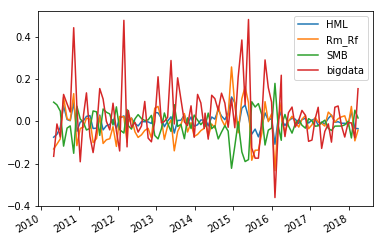

In [50]:
# df_X.describe()
df_X.plot()

In [36]:
X=df_X.values
# np.corrcoef(X,rowvar=False)
X

array([[-3.50672096e-02, -4.21021248e-02,  1.53325202e-02,
         1.53648701e-01],
       [-3.35332316e-02, -9.26328790e-02,  5.21345365e-02,
        -7.78727382e-02],
       [ 4.56214665e-02,  6.98356496e-02, -7.89530363e-02,
        -7.62966960e-03],
       [-1.41775680e-02, -2.33241943e-02, -7.27313241e-05,
        -7.46803954e-03],
       [-9.72382665e-03,  2.55732868e-02, -1.71855358e-02,
        -7.47342040e-02],
       [-9.49274058e-03,  2.07023051e-02, -2.27482976e-02,
        -2.06294264e-02],
       [-2.45364203e-03,  1.17680211e-02, -2.28729924e-02,
         7.20391634e-02],
       [-5.13550171e-03, -4.64361550e-03, -2.31955154e-02,
         6.60585329e-02],
       [ 2.92930158e-02,  2.81985407e-02, -4.34781200e-02,
        -9.87458529e-02],
       [ 1.32565771e-02,  4.30875313e-02, -3.37070063e-02,
        -1.24503036e-02],
       [-1.24095475e-02, -2.31962888e-02,  5.09679561e-03,
        -4.83338040e-02],
       [-4.10269122e-03, -1.09793952e-02, -6.28504901e-03,
      

In [37]:
#get_stocks_r 计算某个数组的股票的收益率Series
#index_date 为观察的数据周期中的日期
#stocks 为要计算的股票数组
#return_data 为总的回报率数据
#df_market_cap 为总的市值数据
def get_stocks_r(index_date,stocks,return_data,df_market_cap):
    s_r = pd.Series(index = index_date)
#     median_size,lmark,hmark=get_div_point(index_date,df_market_cap,btm)
    for date in index_date:
        total_return=0.0
        total_cap=0.0
        for stk in stocks:
            stock_date_cap=df_market_cap[stk][date]
            stock_date_return=return_data[stk][date]*stock_date_cap
            total_cap=total_cap+stock_date_cap
            total_return=total_return+stock_date_return

        s_r[date] = (total_return)/total_cap#每日回报率＝每日总回报/总市值
    return s_r

In [38]:
def get_y(s_y,Rf):
    y = np.array(s_y - Rf)
#     print(y)
    y=y[:data_count-1]
    YT = y.T
    return YT
# y=get_y(return_data_ydyl,Rf)

In [39]:
# str(concept('一带一路'))
arr_ydyl=['000022.XSHE', '000042.XSHE', '000065.XSHE', '000088.XSHE', '000090.XSHE', '000151.XSHE', '000157.XSHE', '000159.XSHE', '000400.XSHE', '000425.XSHE', '000498.XSHE', '000507.XSHE', '000528.XSHE', '000564.XSHE', '000582.XSHE', '000610.XSHE', '000617.XSHE', '000672.XSHE', '000680.XSHE', '000703.XSHE', '000777.XSHE', '000797.XSHE', '000852.XSHE', '000862.XSHE', '000877.XSHE', '000905.XSHE', '000928.XSHE', '000939.XSHE', '000978.XSHE', '600026.XSHG', '600028.XSHG', '600031.XSHG', '600068.XSHG', '600089.XSHG', '600105.XSHG', '600118.XSHG', '600125.XSHG', '600150.XSHG', '600170.XSHG', '600176.XSHG', '600179.XSHG', '600190.XSHG', '600202.XSHG', '600256.XSHG', '600279.XSHG', '600312.XSHG', '600317.XSHG', '600320.XSHG', '600339.XSHG', '600350.XSHG', '600368.XSHG', '600406.XSHG', '600425.XSHG', '600428.XSHG', '600449.XSHG', '600477.XSHG', '600487.XSHG', '600495.XSHG', '600509.XSHG', '600522.XSHG', '600528.XSHG', '600540.XSHG', '600580.XSHG', '600581.XSHG', '600583.XSHG', '600706.XSHG', '600717.XSHG', '600720.XSHG', '600778.XSHG', '600798.XSHG', '600801.XSHG', '600820.XSHG', '600888.XSHG', '600984.XSHG', '002040.XSHE', '600970.XSHG', '002047.XSHE', '002051.XSHE', '600017.XSHG', '600018.XSHG', '601872.XSHG', '601008.XSHG', '002135.XSHE', '601919.XSHG', '002146.XSHE', '601808.XSHG', '601857.XSHG', '601390.XSHG', '601866.XSHG', '002205.XSHE', '002207.XSHE', '601186.XSHG', '601668.XSHG', '002266.XSHE', '601766.XSHG', '601727.XSHG', '601989.XSHG', '002302.XSHE', '002307.XSHE', '002309.XSHE', '601618.XSHG', '601117.XSHG', '300011.XSHE', '002323.XSHE', '002353.XSHE', '601179.XSHG', '601106.XSHG', '002459.XSHE', '300090.XSHE', '300103.XSHE', '601018.XSHG', '002475.XSHE', '601028.XSHG', '002554.XSHE', '002738.XSHE', '601880.XSHG', '002524.XSHE', '300183.XSHE', '601789.XSHG', '300208.XSHE', '300262.XSHE', '601669.XSHG', '601800.XSHG', '603333.XSHG', '603308.XSHG', '300351.XSHE', '603111.XSHG', '600023.XSHG', '300523.XSHE', '300374.XSHE', '603969.XSHG', '603569.XSHG', '603338.XSHG', '603018.XSHG', '603169.XSHG', '002828.XSHE', '603036.XSHG', '603298.XSHG', '603966.XSHG', '603218.XSHG', '601228.XSHG', '600326.XSHG', '603588.XSHG', '603619.XSHG', '600219.XSHG', '300065.XSHE', '002742.XSHE', '600415.XSHG', '603871.XSHG', '300732.XSHE', '600338.XSHG', '600010.XSHG', '600039.XSHG', '601899.XSHG', '002800.XSHE', '601500.XSHG', '300589.XSHE']
if(data_type=="net"):
    arr_ydyl=concept('一带一路')
print('len(arr_ydyl)',len(arr_ydyl))

len(arr_ydyl) 157


In [40]:
# return_data_ydyl=None
# if(data_mode=="fast"):
#     return_data_ydyl=pd.read_csv("return_data_ydyl.csv",index_col=0)
#     return_data_ydyl=trans_index(return_data_ydyl)
# else:
# #     return_data_ydyl=get_return_data(index_date,arr_ydyl,df_price_data)
#     return_data_ydyl=get_stocks_r(index_date,arr_ydyl,return_data,df_market_cap)
return_data_ydyl=get_stocks_r(index_date,arr_ydyl,return_data,df_market_cap)
# return_data_ydyl.to_csv("return_data_ydyl.csv")
return_data_ydyl

2018-03-30   -0.028949
2018-02-28   -0.104921
2018-01-26    0.103772
2017-12-26   -0.019805
2017-11-24   -0.004320
2017-10-24    0.011195
2017-09-22   -0.003050
2017-08-22   -0.000913
2017-07-21    0.055499
2017-06-21    0.014318
2017-05-19   -0.054953
2017-04-19    0.032637
2017-03-17   -0.013705
2017-02-17    0.035753
2017-01-17    0.043298
2016-12-16    0.001903
2016-11-16    0.077130
2016-10-14    0.026541
2016-09-14    0.006522
2016-08-12    0.000897
2016-07-12    0.043105
2016-06-08   -0.006054
2016-05-06   -0.065076
2016-04-06    0.012142
2016-04-01    0.103728
2016-03-01    0.019193
2016-02-01   -0.223980
2015-12-31   -0.007369
2015-11-30   -0.030457
2015-10-30    0.098003
                ...   
2012-09-14   -0.007217
2012-08-14   -0.000178
2012-07-13   -0.055355
2012-06-13   -0.025102
2012-05-11    0.018046
2012-04-11    0.016584
2012-03-30   -0.072500
2012-02-29    0.041254
2012-01-20    0.063403
2011-12-20   -0.063282
2011-11-18    0.008638
2011-10-18   -0.021284
2011-09-16 

In [41]:
YT=get_y(return_data_ydyl,Rf)
X = sm.add_constant(X)
mod = regression.linear_model.OLS(YT, X).fit()
p = mod.params
print(p)
mod.summary()

[-0.02175787  0.46084904  0.11471234 -0.95020802 -0.10981567]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     183.3
Date:                Sat, 02 Jun 2018   Prob (F-statistic):           2.29e-42
Time:                        09:35:55   Log-Likelihood:                 211.01
No. Observations:                  95   AIC:                            -412.0
Df Residuals:                      90   BIC:                            -399.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0218      0.006     -3.653      0.000      -0.034      -0.010
x1             0.4608      0.243      1.898      0.061      -0.021       0.943
x2             0.1147      0.165      0.697      0.488      -0.212       0.442
x3            -0.9502      0.226     -4.211      0.000      -1.398      -0.502
x4            -0.1098      0.029     -3.723      0.000      -0.168      -0.051
==============================================================================
Omnibus:                       22.888   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.834
Skew:                           0.827   Prob(JB):                     1.24e-12
Kurtosis:                       6.335   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#np.corrcoef(X)
# np.seterr(divide='ignore', invalid='ignore')
# np.corrcoef(X,rowvar=False)#终于调用成功了，原因时前面的X = sm.add_constant(X)改变了X，已经不是一个简单的3维数组啦，是4列了，而去第一列的数据是：1.00000000e+00所以报错了。
X
# np.corrcoef??

array([[ 1.00000000e+00, -3.50672096e-02, -4.21021248e-02,
         1.53325202e-02,  1.53648701e-01],
       [ 1.00000000e+00, -3.35332316e-02, -9.26328790e-02,
         5.21345365e-02, -7.78727382e-02],
       [ 1.00000000e+00,  4.56214665e-02,  6.98356496e-02,
        -7.89530363e-02, -7.62966960e-03],
       [ 1.00000000e+00, -1.41775680e-02, -2.33241943e-02,
        -7.27313241e-05, -7.46803954e-03],
       [ 1.00000000e+00, -9.72382665e-03,  2.55732868e-02,
        -1.71855358e-02, -7.47342040e-02],
       [ 1.00000000e+00, -9.49274058e-03,  2.07023051e-02,
        -2.27482976e-02, -2.06294264e-02],
       [ 1.00000000e+00, -2.45364203e-03,  1.17680211e-02,
        -2.28729924e-02,  7.20391634e-02],
       [ 1.00000000e+00, -5.13550171e-03, -4.64361550e-03,
        -2.31955154e-02,  6.60585329e-02],
       [ 1.00000000e+00,  2.92930158e-02,  2.81985407e-02,
        -4.34781200e-02, -9.87458529e-02],
       [ 1.00000000e+00,  1.32565771e-02,  4.30875313e-02,
        -3.37070063e-02

In [43]:
# df_bigdata_origin=pd.read_csv("bigdata.csv",encoding="gbk",index_col=0)
# df_bigdata_origin
# df_bigdata=pd.Series(df_bigdata_origin["收盘点位"],index=df_bigdata_origin.index,name="bigdata")
# # df_bigdata["close"]=df_bigdata_origin["收盘点位"]
# df_bigdata.index.name="index_date"
# df_bigdata.to_csv("bigdata_close.csv")
# df_bigdata=trans_index(df_bigdata)
# df_bigdata2=df_bigdata[df_bigdata.index.isin(index_date)]
# df_bigdata2.to_csv("bigdata_pure.csv")
# df_bigdata=pd.read_csv("bigdata_pure.csv",index_col=0,header=None)
# df_bigdata["test"]=df_bigdata_origin["收盘点位"]
# df_bigdata

In [53]:
price_data=get_price_cs(data_starttime,data_endtime)
price_data

,603186.XSHG,000062.XSHE,300643.XSHE,600315.XSHG,300146.XSHE,000990.XSHE,300631.XSHE,300363.XSHE,600551.XSHG,603656.XSHG,...,601857.XSHG,000825.XSHE,000543.XSHE,002917.XSHE,000569.XSHE,000732.XSHE,600696.XSHG,603288.XSHG,002725.XSHE,002246.XSHE
2010-04-02,NaN,9.6163,NaN,18.0081,NaN,14.8820,NaN,NaN,15.5627,NaN,...,10.5334,7.7195,4.9641,NaN,NaN,1.9866,7.22,NaN,NaN,11.6093
2010-04-06,NaN,9.5244,NaN,18.5700,NaN,15.1620,NaN,NaN,15.2372,NaN,...,10.5334,7.6462,5.0109,NaN,NaN,1.9866,7.17,NaN,NaN,11.7370
2010-04-07,NaN,9.4234,NaN,18.5747,NaN,15.5483,NaN,NaN,15.3205,NaN,...,10.4766,7.8111,4.9589,NaN,NaN,1.9866,7.22,NaN,NaN,11.9540
2010-04-08,NaN,9.4693,NaN,19.1133,NaN,15.6449,NaN,NaN,15.8049,NaN,...,10.3548,7.5913,4.8860,NaN,NaN,1.9866,7.13,NaN,NaN,11.7498
2010-04-09,NaN,9.6347,NaN,19.2201,NaN,15.7801,NaN,NaN,15.8503,NaN,...,10.3954,7.6462,4.9173,NaN,NaN,1.9866,7.15,NaN,NaN,12.1774
2010-04-12,NaN,9.7724,NaN,19.9120,NaN,16.1567,NaN,NaN,16.4786,NaN,...,10.3548,7.4173,4.8444,NaN,NaN,1.9866,7.00,NaN,NaN,12.1774
2010-04-13,NaN,9.4785,NaN,20.1860,NaN,15.6932,NaN,NaN,16.4862,NaN,...,10.5902,7.4997,4.7612,NaN,NaN,1.9866,6.87,NaN,NaN,11.9795
2010-04-14,NaN,10.4245,NaN,19.8335,NaN,15.7608,NaN,NaN,17.1674,NaN,...,10.5253,7.5089,4.7872,NaN,NaN,1.9866,6.94,NaN,NaN,11.8455
2010-04-15,NaN,10.1857,NaN,19.4014,NaN,15.9153,NaN,NaN,16.7662,NaN,...,10.7363,7.4081,4.7351,NaN,NaN,1.9866,6.77,NaN,NaN,11.6349
2010-04-16,NaN,9.9561,NaN,20.1074,NaN,16.6106,NaN,NaN,16.4634,NaN,...,10.5821,7.3440,4.7039,NaN,NaN,1.9866,6.71,NaN,NaN,11.7306


In [56]:
len(price_data.columns)

3631

In [58]:
len(stocks)

3529

In [108]:
# price_data[stocks]
# price_data[not ]
# price_data[]
# np.all(np.any(price_data,axis=1))#==true
# price_data[1940:].groupby("603186.XSHG").size()#np.nan不参与计算，所以无法得出np.nan的个数
# ss=price_data["603186.XSHG"]
# type(ss[0])#np.nan!=NaN,  type(NaN)==numpy.float64
# ss[np.isnan(ss)]

In [109]:
price_data.dropna(axis=1,how='all') 

,603186.XSHG,000062.XSHE,300643.XSHE,600315.XSHG,300146.XSHE,000990.XSHE,300631.XSHE,300363.XSHE,600551.XSHG,603656.XSHG,...,600091.XSHG,601857.XSHG,000825.XSHE,000543.XSHE,002917.XSHE,000732.XSHE,600696.XSHG,603288.XSHG,002725.XSHE,002246.XSHE
2010-04-02,NaN,9.6163,NaN,18.0081,NaN,14.8820,NaN,NaN,15.5627,NaN,...,8.17,10.5334,7.7195,4.9641,NaN,1.9866,7.22,NaN,NaN,11.6093
2010-04-06,NaN,9.5244,NaN,18.5700,NaN,15.1620,NaN,NaN,15.2372,NaN,...,8.28,10.5334,7.6462,5.0109,NaN,1.9866,7.17,NaN,NaN,11.7370
2010-04-07,NaN,9.4234,NaN,18.5747,NaN,15.5483,NaN,NaN,15.3205,NaN,...,8.23,10.4766,7.8111,4.9589,NaN,1.9866,7.22,NaN,NaN,11.9540
2010-04-08,NaN,9.4693,NaN,19.1133,NaN,15.6449,NaN,NaN,15.8049,NaN,...,8.14,10.3548,7.5913,4.8860,NaN,1.9866,7.13,NaN,NaN,11.7498
2010-04-09,NaN,9.6347,NaN,19.2201,NaN,15.7801,NaN,NaN,15.8503,NaN,...,8.13,10.3954,7.6462,4.9173,NaN,1.9866,7.15,NaN,NaN,12.1774
2010-04-12,NaN,9.7724,NaN,19.9120,NaN,16.1567,NaN,NaN,16.4786,NaN,...,8.06,10.3548,7.4173,4.8444,NaN,1.9866,7.00,NaN,NaN,12.1774
2010-04-13,NaN,9.4785,NaN,20.1860,NaN,15.6932,NaN,NaN,16.4862,NaN,...,7.97,10.5902,7.4997,4.7612,NaN,1.9866,6.87,NaN,NaN,11.9795
2010-04-14,NaN,10.4245,NaN,19.8335,NaN,15.7608,NaN,NaN,17.1674,NaN,...,8.01,10.5253,7.5089,4.7872,NaN,1.9866,6.94,NaN,NaN,11.8455
2010-04-15,NaN,10.1857,NaN,19.4014,NaN,15.9153,NaN,NaN,16.7662,NaN,...,7.86,10.7363,7.4081,4.7351,NaN,1.9866,6.77,NaN,NaN,11.6349
2010-04-16,NaN,9.9561,NaN,20.1074,NaN,16.6106,NaN,NaN,16.4634,NaN,...,7.86,10.5821,7.3440,4.7039,NaN,1.9866,6.71,NaN,NaN,11.7306


In [107]:
# price_data.apply(lambda x:x)
# np.percentile([1,2,np.nan,4,5],40)
# price_data.dropna(axis=1,how='all') 
price_data.dropna(axis=1,thresh=len(price_data.index)) 

,000062.XSHE,600315.XSHG,000990.XSHE,600551.XSHG,002245.XSHE,300052.XSHE,002128.XSHE,600497.XSHG,000539.XSHE,600597.XSHG,...,000584.XSHE,000026.XSHE,000590.XSHE,600091.XSHG,601857.XSHG,000825.XSHE,000543.XSHE,000732.XSHE,600696.XSHG,002246.XSHE
2010-04-02,9.6163,18.0081,14.8820,15.5627,2.3894,16.0984,18.7791,7.7479,5.3485,9.3565,...,6.6993,9.4302,8.9749,8.17,10.5334,7.7195,4.9641,1.9866,7.22,11.6093
2010-04-06,9.5244,18.5700,15.1620,15.2372,2.4055,16.2781,18.8146,7.7812,5.3075,9.6219,...,7.0041,9.3771,9.8679,8.28,10.5334,7.6462,5.0109,1.9866,7.17,11.7370
2010-04-07,9.4234,18.5747,15.5483,15.3205,2.4945,16.8433,18.5230,7.7080,5.3280,9.6219,...,6.9614,9.4236,9.8679,8.23,10.4766,7.8111,4.9589,1.9866,7.22,11.9540
2010-04-08,9.4693,19.1133,15.6449,15.8049,2.7439,15.8701,18.2883,7.6115,5.2938,9.7776,...,6.9492,9.5565,9.1959,8.14,10.3548,7.5913,4.8860,1.9866,7.13,11.7498
2010-04-09,9.6347,19.2201,15.7801,15.8503,2.7877,16.3567,18.5941,7.7646,5.2938,10.0889,...,7.1687,9.5432,9.0544,8.13,10.3954,7.6462,4.9173,1.9866,7.15,12.1774
2010-04-12,9.7724,19.9120,16.1567,16.4786,2.8489,16.4690,18.4305,7.7779,5.4100,10.0248,...,7.3637,10.3473,9.1075,8.06,10.3548,7.4173,4.8444,1.9866,7.00,12.1774
2010-04-13,9.4785,20.1860,15.6932,16.4862,2.6622,14.8595,18.4305,7.9309,5.4851,9.8600,...,7.1260,10.6265,8.8334,7.97,10.5902,7.4997,4.7612,1.9866,6.87,11.9795
2010-04-14,10.4245,19.8335,15.7608,17.1674,2.7672,14.5938,18.4163,8.1438,5.5261,9.8417,...,7.2967,10.5401,8.9395,8.01,10.5253,7.5089,4.7872,1.9866,6.94,11.8455
2010-04-15,10.1857,19.4014,15.9153,16.7662,2.8592,14.0361,18.7293,8.0107,5.4510,10.2536,...,7.2662,10.2676,8.6654,7.86,10.7363,7.4081,4.7351,1.9866,6.77,11.6349
2010-04-16,9.9561,20.1074,16.6106,16.4634,2.8664,14.5601,18.2171,7.9109,5.4646,10.1529,...,7.1077,10.2609,8.8511,7.86,10.5821,7.3440,4.7039,1.9866,6.71,11.7306
